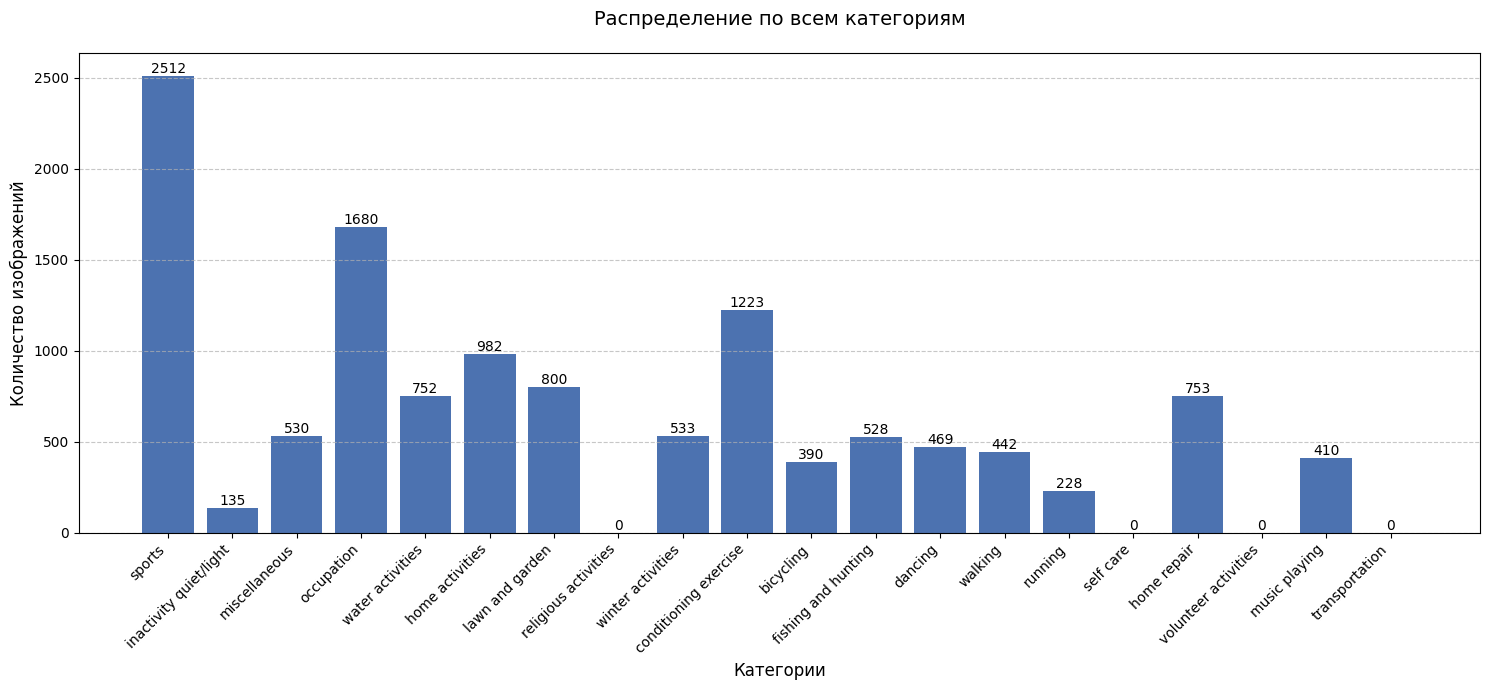

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./human_poses_data/activity_categories.csv')
categories = df.iloc[:, 1].values 

df = pd.read_csv('./human_poses_data/train_answers.csv') 
# 2. Создаем DataFrame с правильным порядком категорий
dist_df = pd.DataFrame({
    'category_id': range(len(categories)),
    'category_name': categories
})

counts = df['target_feature'].value_counts().sort_index()
dist_df['count'] = dist_df['category_id'].map(counts).fillna(0)

plt.figure(figsize=(15, 7))
bars = plt.bar(dist_df['category_name'], dist_df['count'], color='#4c72b0')

plt.title('Распределение по всем категориям', fontsize=14, pad=20)
plt.xlabel('Категории', fontsize=12)
plt.ylabel('Количество изображений', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

In [11]:
import pandas as pd

df = pd.read_csv('./human_poses_data/train_answers.csv') 
def is_empty_like(value):
    if pd.isna(value):
        return True
    value = str(value).strip()
    return value == "" or value == "," or value.endswith(",")

empty_mask = df['target_feature'].apply(is_empty_like)
print(f"Количество пустых значений в 'target_feature': {empty_mask.sum()}")

empty_mask = df['img_id'].apply(is_empty_like)
print(f"Количество пустых значений в 'img_id': {empty_mask.sum()}")

print("Строки с пустыми значениями:")
print(df[empty_mask])

Количество пустых значений в 'target_feature': 0
Количество пустых значений в 'img_id': 0
Строки с пустыми значениями:
Empty DataFrame
Columns: [img_id, target_feature]
Index: []
